In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('movies.csv')
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [4]:
df_new = df[['title','budget_musd','revenue_musd','runtime','cast_size','production_companies']]
df_new.head()

,title,budget_musd,revenue_musd,runtime,cast_size,production_companies
0,Toy Story,30.0,373.554033,81.0,13,Pixar Animation Studios
1,Jumanji,65.0,262.797249,104.0,26,TriStar Pictures|Teitler Film|Interscope Commu...
2,Grumpier Old Men,NaN,NaN,101.0,7,Warner Bros.|Lancaster Gate
3,Waiting to Exhale,16.0,81.452156,127.0,10,Twentieth Century Fox Film Corporation
4,Father of the Bride Part II,NaN,76.578911,106.0,12,Sandollar Productions|Touchstone Pictures


In [8]:
df1 = df_new.dropna()
df_new[['title','budget_musd','runtime']].head(20)

,title,budget_musd,runtime
0,Toy Story,30.0,81.0
1,Jumanji,65.0,104.0
2,Grumpier Old Men,NaN,101.0
3,Waiting to Exhale,16.0,127.0
4,Father of the Bride Part II,NaN,106.0
5,Heat,60.0,170.0
6,Sabrina,58.0,127.0
7,Tom and Huck,NaN,97.0
8,Sudden Death,35.0,106.0
9,GoldenEye,58.0,130.0


In [30]:
avg_vote = df['vote_average'].median()
df.fillna(value = avg_vote, inplace=True)
# df['vote_average'].median()
print(f'There are {df.vote_average.isna().sum()} null values in the dataset now')

There are 0 null values in the dataset now


In [31]:
std = df['vote_average'].std()

q1 = df['vote_average'].quantile(0.25)
q3 = df['vote_average'].quantile(0.75)
iqr = q3-q1
print('IOR =',iqr)

lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

outliers = df[(df['vote_average'] < q1-(1.5*iqr)) | (df['vote_average'] >  q3+(1.5*iqr)) ]
outliers.head()

IOR = 1.5


,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
55,124057,Kids of the Round Table,6.1,1997-07-08,6.1,6.1,en,6.1,6.100000,Telefilm Canada|Melenny Productions,...,3.0,0.307075,89.0,"Set in modern times, Alex finds King Arthur's ...",English,<img src='http://image.tmdb.org/t/p/w185//1y8K...,Johnny Morina|Malcolm McDowell|Maggie Castle|J...,5,3,Robert Tinnell
65,11525,Lawnmower Man 2: Beyond Cyberspace,God made him simple. Science made him a god. N...,1996-01-12,Action|Science Fiction,The Lawnmower Man Collection,en,6.1,2.409225,New Line Cinema,...,2.8,2.495350,92.0,Jobe is resuscitated by Jonathan Walker. He wa...,English|Magyar,<img src='http://image.tmdb.org/t/p/w185//nsKD...,Patrick Bergin|Matt Frewer|Austin O'Brien|Ely ...,15,13,Farhad Mann
186,58372,Reckless,The most twisted Christmas ever.,1995-11-17,Fantasy|Comedy|Drama,6.1,en,6.1,6.100000,Playhouse International Pictures|American Play...,...,10.0,0.119713,91.0,"On Christmas eve, a relentlessly cheerful woma...",English,<img src='http://image.tmdb.org/t/p/w185//edNT...,Mia Farrow|Tony Goldwyn|Scott Glenn|Mary-Louis...,4,17,Norman René
221,61813,Dream Man,6.1,1995-01-01,Thriller,6.1,en,6.1,6.100000,Keystone Pictures|Dream Man Productions Inc,...,2.5,0.155859,6.1,Kris is a homicide cop with psychic abilities....,English,<img src='http://image.tmdb.org/t/p/w185//sWBw...,Patsy Kensit|Bruce Greenwood|Andrew McCarthy|D...,8,2,René Bonnière
238,47867,Gordy,The talking pig who made it big!,1995-05-12,Drama|Family|Fantasy,6.1,en,6.1,3.992809,6.1,...,3.0,0.398924,90.0,A talking pig named Gordy becomes involved in ...,English,<img src='http://image.tmdb.org/t/p/w185//xKGu...,Ted Manson|Afemo Omilami,2,1,Mark Lewis


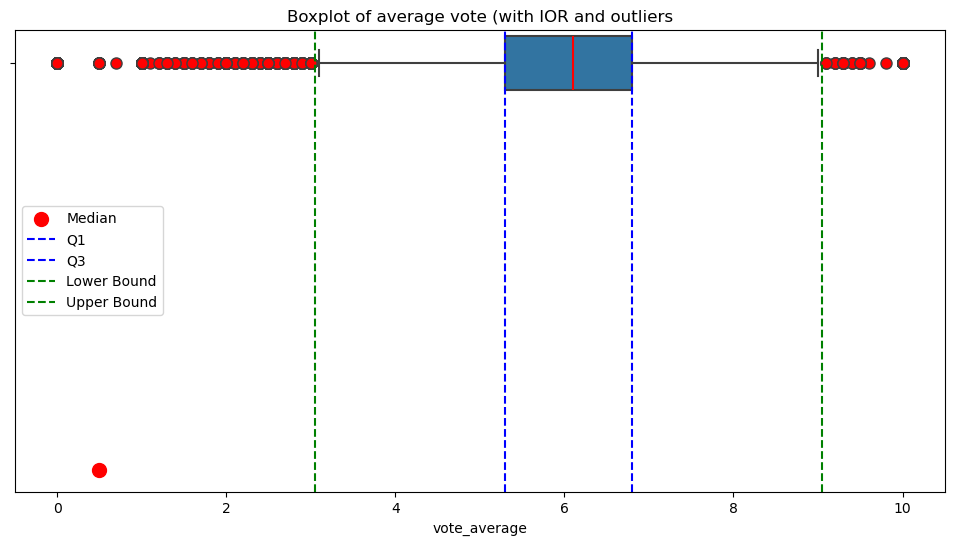

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(x='vote_average',data=df,showfliers=True,medianprops=dict(color='red'), flierprops=dict(marker='o',markerfacecolor='red',markersize=8))
plt.scatter(x=[0.5],y=[avg_vote],s=100,label='Median',color='red')
plt.axvline(x=q1,ls='--',c='b',label='Q1')
plt.axvline(x=q3,ls='--',c='b',label='Q3')
plt.axvline(x=lower_bound,ls='--',c='g',label='Lower Bound')
plt.axvline(x=upper_bound,ls='--',c='g',label='Upper Bound')
plt.legend(loc=0)
plt.title('Boxplot of average vote (with IOR and outliers')
plt.show()

In [37]:
df = pd.read_csv('movies.csv')
df.isna().sum().idxmax()

'belongs_to_collection'

In [42]:
### Gives the index of the column which has max number of null values ###
# df.isna().sum().idxmax()

### To convert   ###
# df['vote_average'] = pd.to_numeric(errors='coerce')
df.describe()

,id,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
std,111806.362236,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154
min,2.000000,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000
